2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Interior
### Basement
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  


### Floors
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  

### Bathroom
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade

### Rooms
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# Architectural & Structural
MSSubClass: The building class  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
Functional: Home functionality rating  
Foundation: Type of foundation  

#  Exterior
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
### Garage
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
  
WoodDeckSF: Wood deck area in square feet  

OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  

PoolArea: Pool area in square feet  
PoolQC: Pool quality  

Fence: Fence quality  

# Location
MSZoning: The general zoning classification  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
## Land
LandContour: Flatness of the property  
LandSlope: Slope of property  

## Lot
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
LotShape: General shape of property  
LotConfig: Lot configuration  

## Access
Street: Type of road access  
Alley: Type of alley access  
PavedDrive: Paved driveway  

# Utilities
Utilities: Type of utilities available
Heating: Type of heating   
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  

# Miscellaneous
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: Value (in dollars) of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
FILE_TRAIN = './challenge_data/train.csv'

df_train = pd.read_csv(FILE_TRAIN)

nrow = df_train.shape[0]

First, we need to check missing value of the data set. Assume that we can remove those variables which have more than 15% missing value, so `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `LotFrontage`. We don't remove `FireplaceQu` because NA value mean there is no fireplace, so it is actually not missing value.

In [5]:
# check missing value with total number and percentage
missing_count = (nrow - df_train.count())
missing_per = (1 - df_train.count()/nrow)
missing = pd.concat([missing_count, missing_per], axis=1, keys=['Total', 'Percent']).sort_values(by='Total', ascending=False)
missing[missing['Total'] > 0]

,Total,Percent
PoolQC,1196,0.996667
MiscFeature,1153,0.960833
Alley,1125,0.937500
Fence,973,0.810833
FireplaceQu,564,0.470000
LotFrontage,210,0.175000
GarageYrBlt,67,0.055833
GarageFinish,67,0.055833
GarageType,67,0.055833
GarageQual,67,0.055833


### Dealing with missing value

In [13]:
# The missing value in garage variables means no garage. So replace NA value with NoGarage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')
# Using 0 for the year value
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)


# 1. Descriptive analysis 

Let's take a look at our data and make descriptive analysis to understand the variables and the `SalePrice` which we want to predict.

## 1.1 SalePrice

First, plot the historam of SalePrice with the kernel density estimate. The data is heavily right skewed, so the mean will be larger than the median. The boxplot shows that there are many outliers lying in the right of the historam. 

To make thing more easier, we can transform `SalePrice` using log transform. It help to reduce the value and skewness of data so that the patterns in the data will be more interpretable and meet the assumptions of inferential statistics. The historam and kernel estimation of log transform looks more normal!

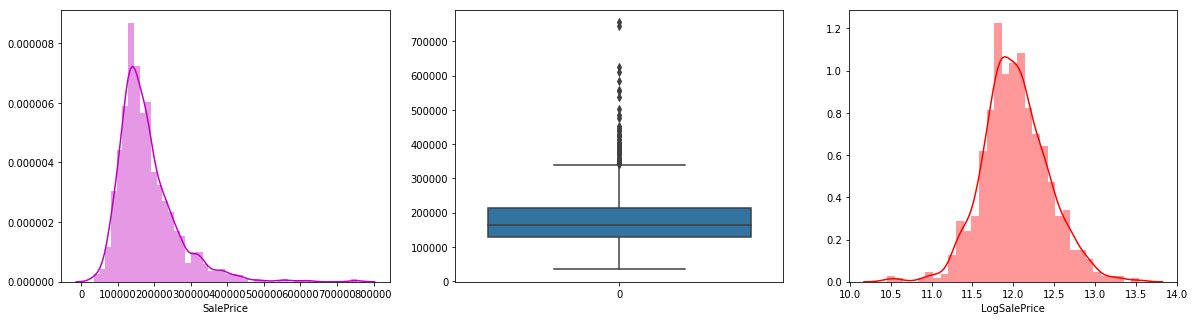

In [6]:
plt.subplots(figsize =(20, 5))

# historam
plt.subplot(1, 3, 1)
sns.distplot(df_train['SalePrice'], color='m');

# boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=df_train['SalePrice']);

# log transformation
df_train["LogSalePrice"] = np.log(df_train['SalePrice'])
# historam of log
plt.subplot(1, 3, 3)
sns.distplot(df_train['LogSalePrice'], color='r');

In [7]:
# simple statistics
df_train[["SalePrice", "LogSalePrice"]].describe()

,SalePrice,LogSalePrice
count,1200.000000,1200.000000
mean,181414.628333,12.024861
std,81070.908544,0.403556
min,34900.000000,10.460242
25%,129900.000000,11.774520
50%,163700.000000,12.005790
75%,214000.000000,12.273731
max,755000.000000,13.534473


Next, we analysis predictor variables. To make thing easier to analysis, we split the predictor variables into different categories. So in each category, we do analysis for each variable, and evaluate the correlation between them. In this work, we group variables based on the description of them.

## 1.2 Interior

## 1.x Garage

### GarageType

Garage location.  
Using box plot and strip plot to see the difference between garage type. The figures show that `builtin` and `attached` have larger mean than the others and have many extreme values. `Detached` has a small range of value compared to `attached` and `builtin`. The other types have too small number of records to be significant.

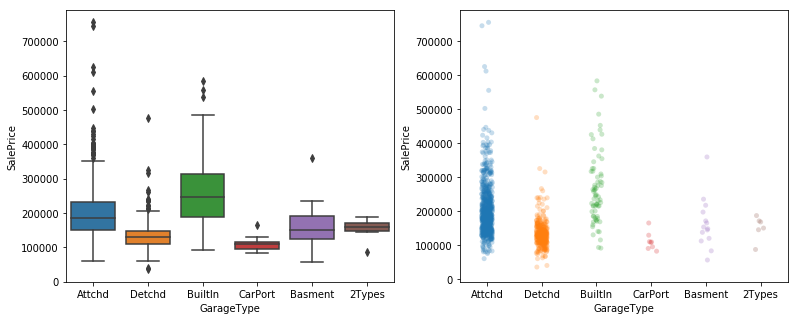

In [8]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageType", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageType", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


In [9]:
df_train["GarageType"].describe()

count       1133
unique         6
top       Attchd
freq         718
Name: GarageType, dtype: object

### GarageYrBlt

Year garage was built.
We can see that there is an increasing trend over years. Not just the mean value, the variance of price also has the increasing trend.

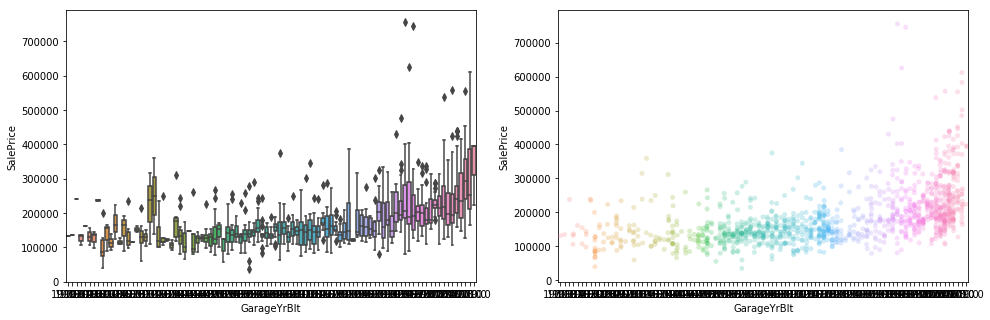

In [11]:
plt.subplots(figsize =(25, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageYrBlt", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageFinish

Interior finish of the garage.  
There is a clear difference between `Finished`, `RoughFinished` with the others.

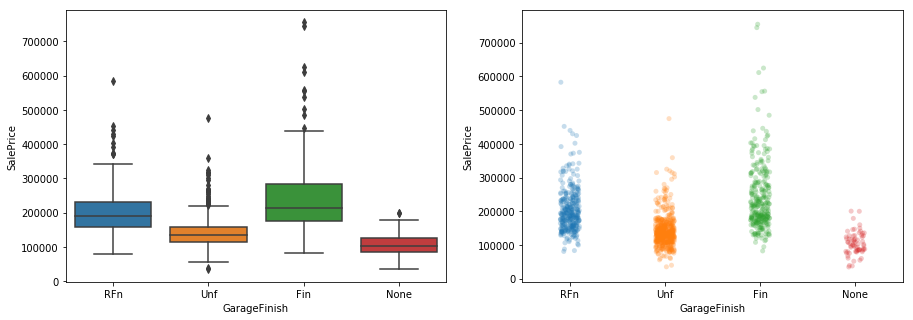

In [20]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageFinish", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageCars

Size of garage in car capacity.  
The figures show that the price increases when there is more capacity.

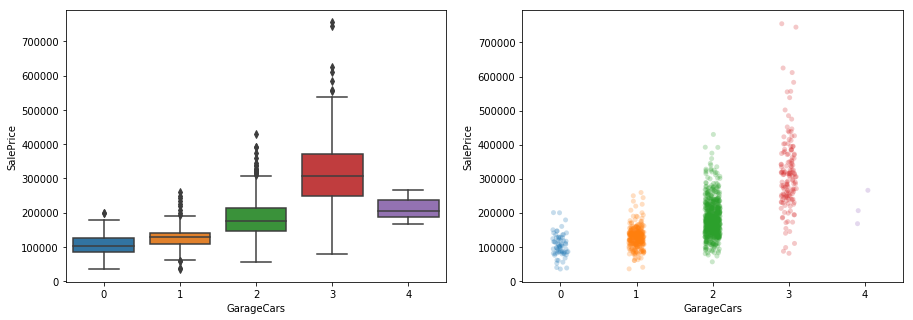

In [19]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageArea

Size of garage in square feet.
First, look at scatter plot, we can see a correlation between `GarageArea` and `SalePrice`. The box plot shows distribution of `GarageArea`. With both figures, we can remove three outlier on the bottom left of the scatter plot!

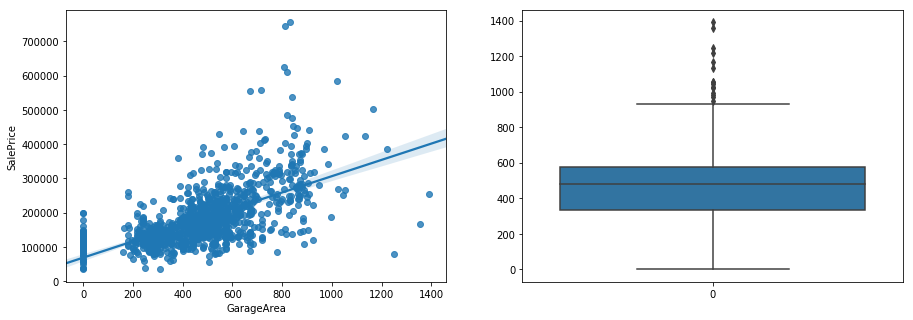

In [27]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="GarageArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['GarageArea']);


### GarageQual [X]

Garage quality.  
There is not much information in this variable. Most garages are on `Typical/Average` group.

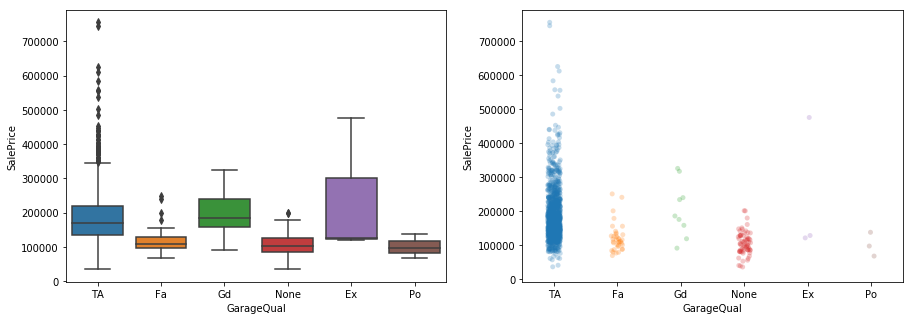

In [29]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageQual", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageCond [X]

Garage condition is the same as above.

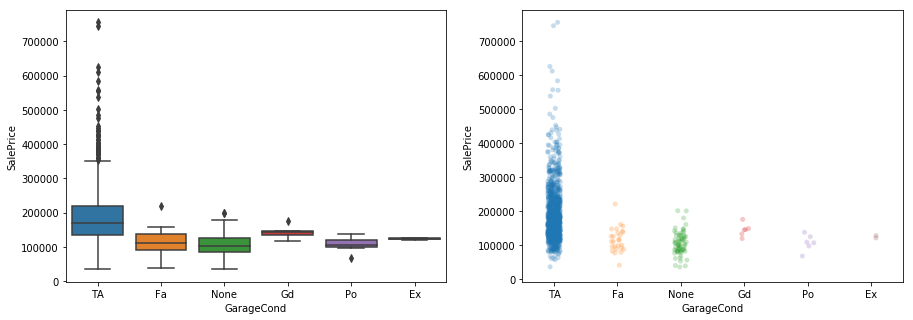

In [31]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageCond", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageCond", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.x Wood deck and porch [x]

### WoodDeckSF

Wood deck area in square feet.  
There is a slightly correlation, but it is neglectable.

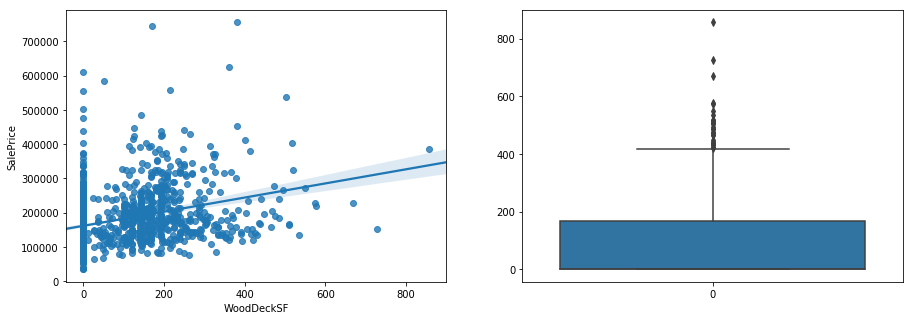

In [32]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="WoodDeckSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['WoodDeckSF']);


### OpenPorchSF

Open porch area in square feet.

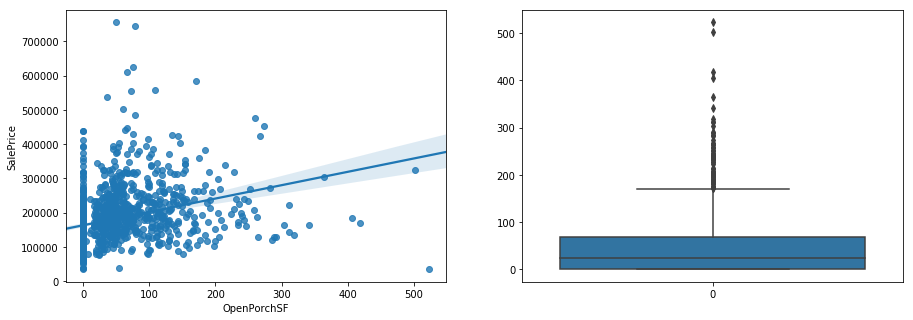

In [40]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="OpenPorchSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['OpenPorchSF']);


### EnclosedPorch

Enclosed porch area in square feet.

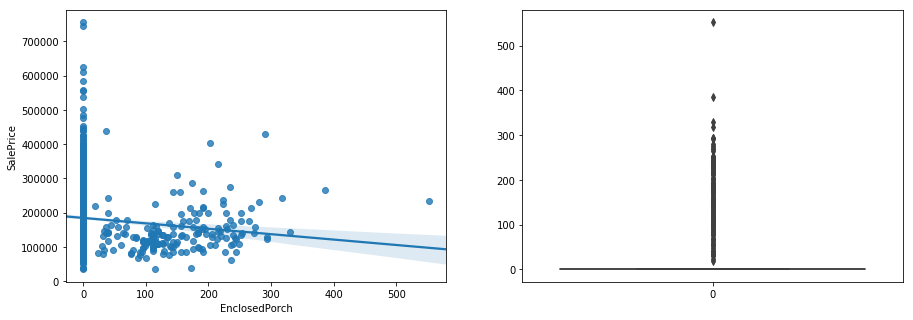

In [42]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="EnclosedPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['EnclosedPorch']);


### 3SsnPorch

Three season porch area in square feet.

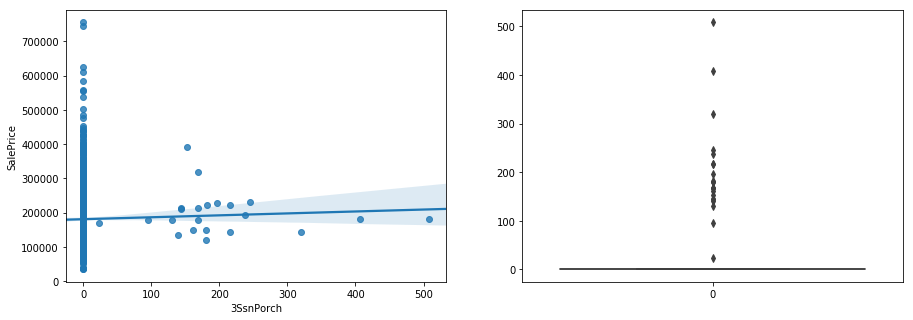

In [41]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="3SsnPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['3SsnPorch']);


### ScreenPorch

Screen porch area in square feet.

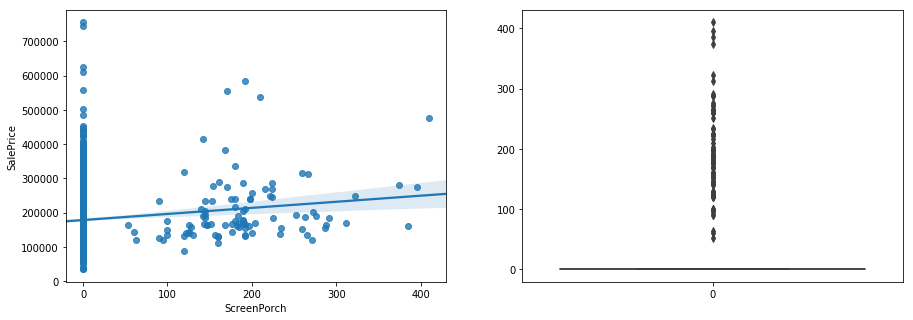

In [43]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="ScreenPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['ScreenPorch']);


The porch variables have little information that we can use, so we can remove these variables.

### PoolArea [x]

Pool area in square feet.

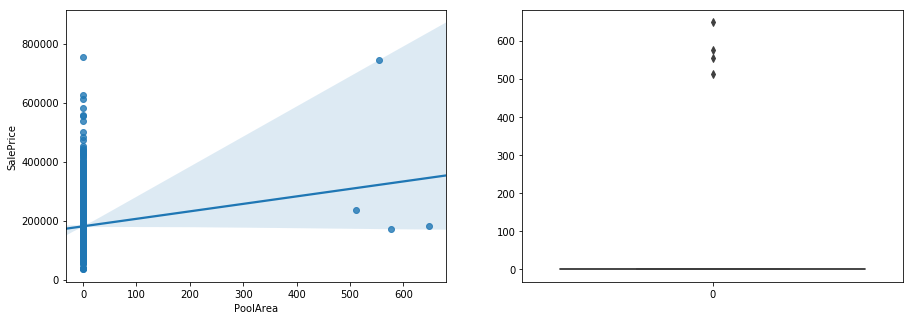

In [44]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="PoolArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['PoolArea']);


### Fence

There is not much difference between fence quality.

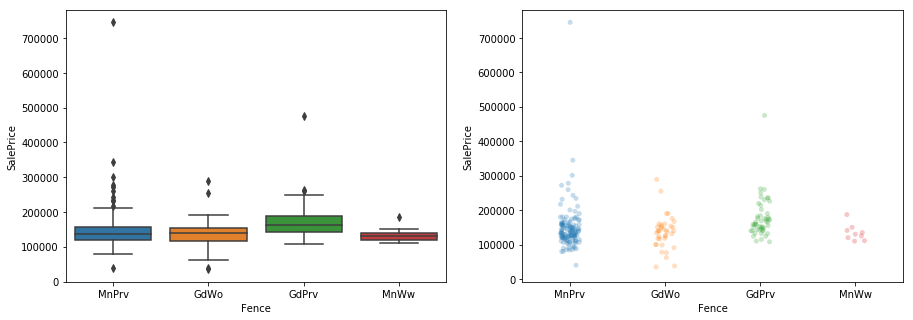

In [46]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Fence", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Fence", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);
